In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Look at the data

In [2]:
chunk_iter = pd.read_csv('crunchbase-investments.csv',nrows=5,encoding='ISO-8859-1' )

In [3]:
chunk_iter._data

BlockManager
Items: Index(['company_permalink', 'company_name', 'company_category_code',
       'company_country_code', 'company_state_code', 'company_region',
       'company_city', 'investor_permalink', 'investor_name',
       'investor_category_code', 'investor_country_code',
       'investor_state_code', 'investor_region', 'investor_city',
       'funding_round_type', 'funded_at', 'funded_month', 'funded_quarter',
       'funded_year', 'raised_amount_usd'],
      dtype='object')
Axis 1: RangeIndex(start=0, stop=5, step=1)
IntBlock: slice(18, 20, 1), 2 x 5, dtype: int64
ObjectBlock: slice(0, 18, 1), 18 x 5, dtype: object

In [4]:
chunk_iter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 20 columns):
company_permalink         5 non-null object
company_name              5 non-null object
company_category_code     5 non-null object
company_country_code      5 non-null object
company_state_code        4 non-null object
company_region            5 non-null object
company_city              4 non-null object
investor_permalink        5 non-null object
investor_name             5 non-null object
investor_category_code    4 non-null object
investor_country_code     5 non-null object
investor_state_code       5 non-null object
investor_region           5 non-null object
investor_city             5 non-null object
funding_round_type        5 non-null object
funded_at                 5 non-null object
funded_month              5 non-null object
funded_quarter            5 non-null object
funded_year               5 non-null int64
raised_amount_usd         5 non-null int64
dtypes: int64(2), obj

In [5]:
chunk_iter

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,NaN,USA,NY,New York,New York,series-a,2012-10-30,2012-10,2012-Q4,2012,2000000
1,/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-23,2012-01,2012-Q1,2012,20000
2,/company/utap,uTaP,messaging,USA,NaN,United States - Other,NaN,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-01,2012-01,2012-Q1,2012,20000
3,/company/zoopshop,ZoopShop,software,USA,OH,Columbus,columbus,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2012-02-15,2012-02,2012-Q1,2012,20000
4,/company/efuneral,eFuneral,web,USA,OH,Cleveland,Cleveland,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2011-09-08,2011-09,2011-Q3,2011,20000


total rows

In [6]:
num_rows = 0
chunk_iter = pd.read_csv('crunchbase-investments.csv',chunksize=5000,encoding='ISO-8859-1' )
for chunk in chunk_iter:
    num_rows += len(chunk)
    
num_rows

52870

memory usage of each chunk

In [7]:
chunk_iter = pd.read_csv('crunchbase-investments.csv',chunksize=5000,encoding='ISO-8859-1' )
memory_usage = []
for chunk in chunk_iter:
    memory_usage.append(chunk.memory_usage(deep=True)
                        .sum()/(1024*1024))

print(memory_usage)

[5.5791950225830078, 5.5281867980957031, 5.5350046157836914, 5.528162956237793, 5.5243072509765625, 5.5534124374389648, 5.5313911437988281, 5.509613037109375, 5.3960905075073242, 4.6394519805908203, 2.6636686325073242]


null values for each column 

In [8]:
chunk_iter = pd.read_csv('crunchbase-investments.csv',chunksize=5000,encoding='ISO-8859-1' )
nulls = []
for chunk in chunk_iter:
    nulls.append(chunk.isnull().sum())
nulls

[company_permalink            0
 company_name                 0
 company_category_code       52
 company_country_code         0
 company_state_code          53
 company_region               0
 company_city                64
 investor_permalink           0
 investor_name                0
 investor_category_code    2557
 investor_country_code      778
 investor_state_code       1371
 investor_region              0
 investor_city              900
 funding_round_type           0
 funded_at                    0
 funded_month                 0
 funded_quarter               0
 funded_year                  0
 raised_amount_usd          653
 dtype: int64, company_permalink            0
 company_name                 0
 company_category_code       51
 company_country_code         0
 company_state_code          43
 company_region               0
 company_city                45
 investor_permalink           0
 investor_name                0
 investor_category_code    5000
 investor_country_code    

memory usage for each object column

In [9]:
chunk_iter = pd.read_csv('crunchbase-investments.csv',chunksize=5000,encoding='ISO-8859-1' )
obj_mem = []
for chunk in chunk_iter:
    obj = chunk.select_dtypes(include=['object'])
    obj_mem.append(obj.memory_usage(deep=True))
    
obj_mem[1]

Index                        84
company_permalink        385724
company_name             341880
company_category_code    324922
company_country_code     300000
company_state_code       293839
company_region           322512
company_city             331356
investor_permalink       493776
investor_name            374250
investor_country_code    292692
investor_state_code      275722
investor_region          319407
investor_city            321451
funding_round_type       324109
funded_at                335000
funded_month             320000
funded_quarter           320000
dtype: int64

([array([ 1.,  0.,  0.,  0.,  1.,  5.,  9.,  2.,  1.,  0.]),
  array([  1.,   0.,   0.,   0.,   0.,   4.,  10.,   2.,   0.,   1.]),
  array([  1.,   0.,   0.,   0.,   0.,   4.,  10.,   2.,   0.,   1.]),
  array([  1.,   0.,   0.,   0.,   0.,   4.,  10.,   2.,   0.,   1.]),
  array([  1.,   0.,   0.,   0.,   0.,   4.,  10.,   2.,   0.,   1.]),
  array([  1.,   0.,   0.,   0.,   0.,   4.,  10.,   2.,   0.,   1.]),
  array([  1.,   0.,   0.,   0.,   0.,   4.,  10.,   2.,   0.,   1.]),
  array([  1.,   0.,   0.,   0.,   0.,   4.,  10.,   2.,   0.,   1.]),
  array([ 1.,  0.,  0.,  0.,  1.,  4.,  9.,  2.,  0.,  1.]),
  array([  1.,   0.,   0.,   0.,   0.,   2.,  10.,   2.,   0.,   0.]),
  array([  1.,   0.,   0.,  12.,   2.,   0.,   0.,   0.,   0.,   0.])],
 array([  8.00000000e+01,   5.06867000e+04,   1.01293400e+05,
          1.51900100e+05,   2.02506800e+05,   2.53113500e+05,
          3.03720200e+05,   3.54326900e+05,   4.04933600e+05,
          4.55540300e+05,   5.06147000e+05]),
 <a li

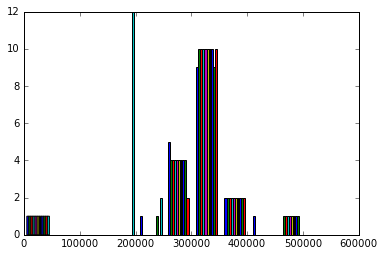

In [10]:
plt.hist(obj_mem)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  9.]),
 array([ 2.66366863,  2.95522127,  3.24677391,  3.53832655,  3.82987919,
         4.12143183,  4.41298447,  4.70453711,  4.99608974,  5.28764238,
         5.57919502]),
 <a list of 10 Patch objects>)

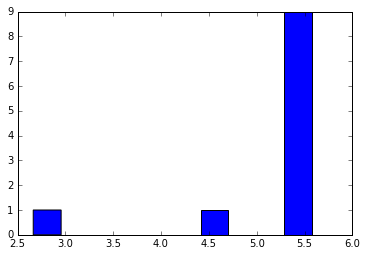

In [11]:
plt.hist(memory_usage)

Convert to categorical to save memory

In [12]:
chunk_iter = pd.read_csv('crunchbase-investments.csv',chunksize=5000,encoding='ISO-8859-1',parse_dates=['funded_at'] )
new_memory_usage = []
for chunk in chunk_iter:
    col = chunk.columns
    for c in col:
        if chunk[c].dtype == 'object':
            num_unique_values = len(chunk[c].unique())
            num_total_values = len(chunk[c])
            if num_unique_values / num_total_values < 0.5:
                chunk[c] = chunk[c].astype('category')
    new_memory_usage.append(chunk.memory_usage(deep=True).sum()/(1024*1024))
 


In [13]:
new_memory_usage


[1.2514019012451172,
 1.148869514465332,
 1.1499710083007812,
 1.1027450561523438,
 1.1362400054931641,
 1.1322307586669922,
 1.1583738327026367,
 1.1366949081420898,
 1.1768007278442383,
 1.0204048156738281,
 0.80860233306884766]

New memory usage

(array([ 1.,  0.,  0.,  0.,  1.,  0.,  1.,  6.,  1.,  1.]),
 array([ 0.80860233,  0.85288229,  0.89716225,  0.9414422 ,  0.98572216,
         1.03000212,  1.07428207,  1.11856203,  1.16284199,  1.20712194,
         1.2514019 ]),
 <a list of 10 Patch objects>)

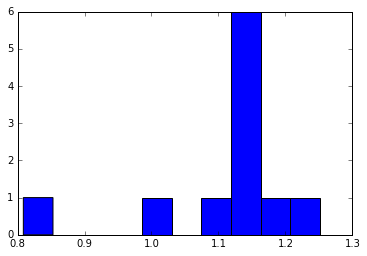

In [14]:
plt.hist(new_memory_usage)

Create sqlite db and table

In [15]:
import sqlite3

sqlite_file = 'crunch_db.sqlite'

conn = sqlite3.connect(sqlite_file)
chunk_iter = pd.read_csv('crunchbase-investments.csv',chunksize=5000,encoding='ISO-8859-1',parse_dates=['funded_at'] )
new_memory_usage = []
for chunk in chunk_iter:
    col = chunk.columns
    for c in col:
        if chunk[c].dtype == 'object':
            num_unique_values = len(chunk[c].unique())
            num_total_values = len(chunk[c])
            if num_unique_values / num_total_values < 0.5:
                chunk[c] = chunk[c].astype('category')
    chunk.to_sql('crunch_tables', conn,if_exists='append', index=False)


In [16]:
results_df = pd.read_sql('PRAGMA table_info(crunch_tables);', conn)
results_df

,cid,name,type,notnull,dflt_value,pk
0,0,company_permalink,TEXT,0,None,0
1,1,company_name,TEXT,0,None,0
2,2,company_category_code,TEXT,0,None,0
3,3,company_country_code,TEXT,0,None,0
4,4,company_state_code,TEXT,0,None,0
5,5,company_region,TEXT,0,None,0
6,6,company_city,TEXT,0,None,0
7,7,investor_permalink,TEXT,0,None,0
8,8,investor_name,TEXT,0,None,0
9,9,investor_category_code,TEXT,0,None,0


In [17]:
df = pd.read_sql('select * from crunch_tables;',conn)
df.head()

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,None,USA,NY,New York,New York,series-a,2012-10-30 00:00:00,2012-10,2012-Q4,2012.0,2000000.0
1,/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-23 00:00:00,2012-01,2012-Q1,2012.0,20000.0
2,/company/utap,uTaP,messaging,USA,None,United States - Other,None,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-01 00:00:00,2012-01,2012-Q1,2012.0,20000.0
3,/company/zoopshop,ZoopShop,software,USA,OH,Columbus,columbus,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2012-02-15 00:00:00,2012-02,2012-Q1,2012.0,20000.0
4,/company/efuneral,eFuneral,web,USA,OH,Cleveland,Cleveland,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2011-09-08 00:00:00,2011-09,2011-Q3,2011.0,20000.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52870 entries, 0 to 52869
Data columns (total 20 columns):
company_permalink         52869 non-null object
company_name              52869 non-null object
company_category_code     52227 non-null object
company_country_code      52869 non-null object
company_state_code        52378 non-null object
company_region            52869 non-null object
company_city              52337 non-null object
investor_permalink        52868 non-null object
investor_name             52868 non-null object
investor_category_code    2443 non-null object
investor_country_code     40869 non-null object
investor_state_code       36061 non-null object
investor_region           52868 non-null object
investor_city             40390 non-null object
funding_round_type        52867 non-null object
funded_at                 52867 non-null object
funded_month              52867 non-null object
funded_quarter            52867 non-null object
funded_year               52

Delete some unnecessary columns and free up more space

In [20]:
df.drop(['company_permalink','investor_permalink'], axis=1,inplace=True)


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52870 entries, 0 to 52869
Data columns (total 18 columns):
company_name              52869 non-null object
company_category_code     52227 non-null object
company_country_code      52869 non-null object
company_state_code        52378 non-null object
company_region            52869 non-null object
company_city              52337 non-null object
investor_name             52868 non-null object
investor_category_code    2443 non-null object
investor_country_code     40869 non-null object
investor_state_code       36061 non-null object
investor_region           52868 non-null object
investor_city             40390 non-null object
funding_round_type        52867 non-null object
funded_at                 52867 non-null object
funded_month              52867 non-null object
funded_quarter            52867 non-null object
funded_year               52867 non-null float64
raised_amount_usd         49271 non-null float64
dtypes: float64(2), object

In [22]:
df.head()

,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_name,investor_category_code,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd
0,AdverCar,advertising,USA,CA,SF Bay,San Francisco,1-800-FLOWERS.COM,None,USA,NY,New York,New York,series-a,2012-10-30 00:00:00,2012-10,2012-Q4,2012.0,2000000.0
1,LaunchGram,news,USA,CA,SF Bay,Mountain View,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-23 00:00:00,2012-01,2012-Q1,2012.0,20000.0
2,uTaP,messaging,USA,None,United States - Other,None,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2012-01-01 00:00:00,2012-01,2012-Q1,2012.0,20000.0
3,ZoopShop,software,USA,OH,Columbus,columbus,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2012-02-15 00:00:00,2012-02,2012-Q1,2012.0,20000.0
4,eFuneral,web,USA,OH,Cleveland,Cleveland,10Xelerator,finance,USA,OH,Columbus,Columbus,other,2011-09-08 00:00:00,2011-09,2011-Q3,2011.0,20000.0


Which category of company raised the most money?

In [28]:
top_cat = pd.DataFrame(pd.pivot_table(df, values='raised_amount_usd', 
                    columns=['company_category_code'], aggfunc=np.sum))

In [30]:
top_cat.sort_values(by='raised_amount_usd',ascending=False).head(10)

,raised_amount_usd
company_category_code,
biotech,1.103964e+11
software,7.308452e+10
mobile,6.477738e+10
cleantech,5.270523e+10
enterprise,4.586093e+10
web,4.014326e+10
medical,2.536711e+10
advertising,2.507666e+10
ecommerce,2.256722e+10


Which investor contributed the most money (across all startups)?

In [36]:
top_inv = pd.DataFrame(pd.pivot_table(df, values='raised_amount_usd', 
                    columns=['investor_name'], aggfunc=np.sum))



In [37]:
top_inv.sort_values(by='raised_amount_usd',ascending=False).head(10)

,raised_amount_usd
investor_name,
Kleiner Perkins Caufield & Byers,1.121783e+10
New Enterprise Associates,9.692542e+09
Accel Partners,6.472126e+09
Goldman Sachs,6.375459e+09
Sequoia Capital,6.039402e+09
Intel,5.969200e+09
Google,5.808800e+09
Time Warner,5.730000e+09
Comcast,5.669000e+09


Which investors contributed the most money per startup?

In [44]:
inv_for_startup = pd.DataFrame(pd.pivot_table(df, values='raised_amount_usd', 
                    columns=['company_name','investor_name'], aggfunc=np.sum))


In [47]:
inv_for_startup.sort_values(by=0,ascending=False).head(10)



0
company_name investor_name                         
Clearwire    Comcast                   5.620000e+09
             Intel                     5.620000e+09
             Time Warner               5.620000e+09
             BrightHouse               4.700000e+09
             Google                    3.200000e+09
sigmacare    Marlin Equity Partners    2.600000e+09
Clearwire    Sprint Nextel             2.500000e+09
             Eagle River Holdings      2.420000e+09
Facebook     Digital Sky Technologies  1.700000e+09
             Goldman Sachs             1.500000e+09

Which funding rounds were the most popular/least popular?

In [48]:
funding_round = pd.DataFrame(pd.pivot_table(df, values='raised_amount_usd', 
                    columns=['funding_round_type'], aggfunc=np.sum))

In [52]:
funding_round.sort_values(by='raised_amount_usd',ascending=False).head(10)



,raised_amount_usd
funding_round_type,
series-c+,2.657535e+11
venture,1.305565e+11
series-b,1.283268e+11
series-a,8.654215e+10
post-ipo,3.091760e+10
other,1.850726e+10
private-equity,1.615988e+10
angel,4.962075e+09
crowdfunding,6.491500e+06
